# 交叉驗證(Cross-Validation)

##### 先引入我們所要的packages

In [2]:
import os 
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# 資料前處理

In [3]:
# 設定放置檔案的資料夾路徑
file_path="C:\\Users\\user\\Downloads\\2020天氣"
os.chdir(file_path)                                                
file_list = os.listdir()
# 先讀取第一個csv檔，並以DataFrame的形式存取
df =  pd.read_csv(file_path+"\\"+file_list[0])
# 把不要的行數過濾掉
df = df.reindex(df.index.drop(0)).reset_index(drop=True)
# 擷取我們想要的欄位，並以float形式讀取
data=pd.concat([df['測站氣壓(hPa)'].astype(float),df['氣溫(℃)'].astype(float),
                df['露點溫度(℃)'].astype(float),df['相對溼度(%)'].astype(float),
                df['風速(m/s)'].astype(float),df['日照時數(hour)'].astype(float)], axis=1)
# 以和上述相同方式讀取所有csv檔
for i in range(1,12):
    df =  pd.read_csv(file_path+"\\"+file_list[i])
    df = df.reindex(df.index.drop(0)).reset_index(drop=True)
    temp_data=pd.concat([df['測站氣壓(hPa)'].astype(float),df['氣溫(℃)'].astype(float),
                         df['露點溫度(℃)'].astype(float),df['相對溼度(%)'].astype(float),
                         df['風速(m/s)'].astype(float),df['日照時數(hour)'].astype(float)], axis=1)
    # 每讀完一個資料夾就把這次讀取的資料和上一次作合併
    data=pd.concat([data,temp_data],axis=0)
# 重新排列我們的資料
data=data.reset_index(drop=True)
# 插入時間資料
data.insert(5,"時間(days)",np.linspace(1,366,366)) 
data

,測站氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),時間(days),日照時數(hour)
0,1024.1,16.0,13.5,85.0,3.9,1.0,0.1
1,1021.2,19.9,13.9,70.0,3.8,2.0,9.8
2,1018.6,21.0,13.8,65.0,3.1,3.0,9.2
3,1017.1,21.1,14.5,68.0,2.6,4.0,9.4
4,1017.4,22.1,16.2,71.0,3.7,5.0,6.1
...,...,...,...,...,...,...,...
361,1013.2,19.7,16.6,83.0,1.5,362.0,2.1
362,1012.4,20.2,16.9,82.0,4.1,363.0,0.1
363,1010.2,21.6,17.6,79.0,1.2,364.0,2.0
364,1022.3,12.7,7.4,70.0,3.0,365.0,0.0


# 繪圖

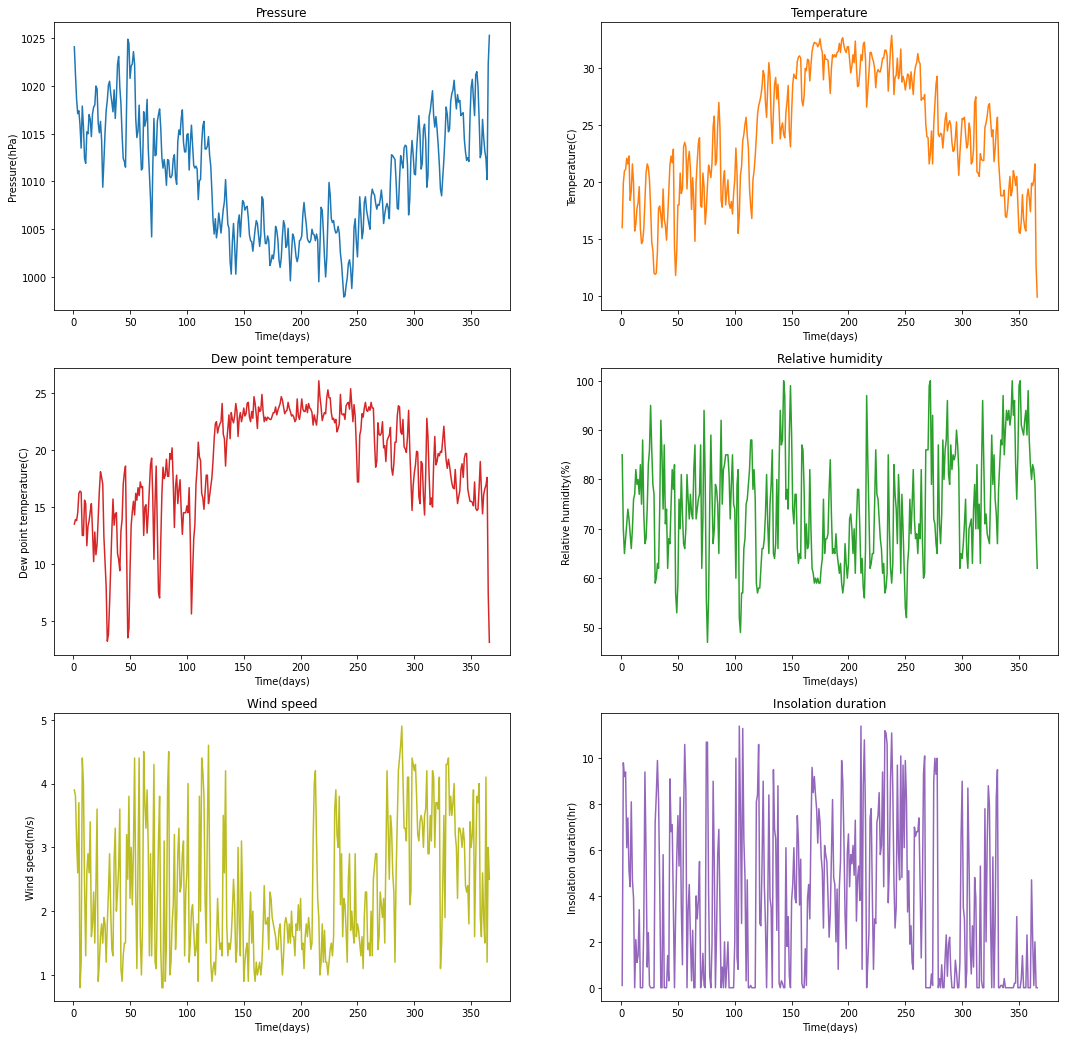

In [4]:
plt.rcParams["figure.figsize"] = (18,18)
fig, axs = plt.subplots(3, 2)
# 時間和測站壓力關係圖
axs[0, 0].plot(data.iloc[:,5], data.iloc[:,0], 'tab:blue')
axs[0, 0].set_title("Pressure")
axs[0, 0].set_xlabel('Time(days)')
axs[0, 0].set_ylabel('Pressure(hPa)')
# 時間和氣溫關係圖
axs[0, 1].plot(data.iloc[:,5], data.iloc[:,1], 'tab:orange')
axs[0, 1].set_title('Temperature')
axs[0, 1].set_xlabel('Time(days)')
axs[0, 1].set_ylabel('Temperature(C)')
#時間和露點溫度關係圖
axs[1, 0].plot(data.iloc[:,5], data.iloc[:,2], 'tab:red')
axs[1, 0].set_title('Dew point temperature')
axs[1, 0].set_xlabel('Time(days)')
axs[1, 0].set_ylabel('Dew point temperature(C)')
# 時間和相對溼度關係圖
axs[1, 1].plot(data.iloc[:,5], data.iloc[:,3], 'tab:green')
axs[1, 1].set_title('Relative humidity')
axs[1, 1].set_xlabel('Time(days)')
axs[1, 1].set_ylabel('Relative humidity(%)')
# 時間和風速關係圖
axs[2, 0].plot(data.iloc[:,5], data.iloc[:,4], 'tab:olive')
axs[2, 0].set_title('Wind speed')
axs[2, 0].set_xlabel('Time(days)')
axs[2, 0].set_ylabel('Wind speed(m/s)')
# 時間和日照時間關係圖
axs[2, 1].plot(data.iloc[:,5], data.iloc[:,6], 'tab:purple')
axs[2, 1].set_title('Insolation duration')
axs[2, 1].set_xlabel('Time(days)')
axs[2, 1].set_ylabel('Insolation duration(hr)')
plt.show()

# 標準化

In [5]:
for i in range(0,7):
    temp_array=data.iloc[:,i].values
    data.iloc[:,i]=(temp_array-np.mean(temp_array))/np.std(temp_array)
data

,測站氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),時間(days),日照時數(hour)
0,2.224235,-1.543547,-1.174842,0.971111,1.502002,-1.727325,-1.039450
1,1.747353,-0.811762,-1.087578,-0.398372,1.404670,-1.717860,1.764909
2,1.319804,-0.605361,-1.109394,-0.854867,0.723344,-1.708395,1.591443
3,1.073141,-0.586597,-0.956683,-0.580970,0.236682,-1.698930,1.649265
4,1.122474,-0.398960,-0.585812,-0.307074,1.307337,-1.689466,0.695205
...,...,...,...,...,...,...,...
361,0.431817,-0.849289,-0.498548,0.788513,-0.833973,1.689466,-0.461232
362,0.300264,-0.755470,-0.433100,0.697214,1.696666,1.698930,-1.039450
363,-0.061508,-0.492778,-0.280389,0.423317,-1.125970,1.708395,-0.490143
364,1.928239,-2.162749,-2.505615,-0.398372,0.626011,1.717860,-1.068361


# 梯度下降

In [6]:
def refresh(X,y,w,a):
    # 這裡可以比照公式
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    # 更新權重
    new_w=w-a*dJ
    return new_w

# Mean Square Error

In [7]:
def mean_square_error(x,y,w):
    pred_y=x.dot(w.T)
    error=sum((pred_y-y)**2)/len(y)
    return error

# Mean Absolute Error

In [8]:
def mean_absolute_error(x,y,w):
    pred_y=x.dot(w.T)
    error=sum(abs(pred_y-y))/len(y)
    return error

# R square

In [9]:
def r_square(x,y,w):
    pred_y=x.dot(w.T)
    r_2=1-((sum((pred_y-y)**2)/len(y))/(sum((np.mean(y)-y)**2)/len(y)))
    return r_2

# 回歸分析(2次方特徵轉換)

In [10]:
def Regression(a,train_x,train_y,test_x,test_y,p):
    # a：學習速度參數
    # X：資料矩陣
    # w：權重
    # feat_num：原本特徵的長度
    feat_num=len(test_x[0])
    # 創建訓練集和測試集之二次特徵轉換矩陣
    # 數量為1+feat_num+(1+feat_num)*feat_num/2個
    train_X=np.ones((len(train_x),int(1+feat_num+(1+feat_num)*feat_num/2)))
    test_X=np.ones((len(test_x),int(1+feat_num+(1+feat_num)*feat_num/2)))
    # 標號0的欄位特徵接為1
    # 標號1~feat_num欄位的特徵
    # 分別對應原本的資料
    train_X[:,1:feat_num+1]=train_x
    test_X[:,1:feat_num+1]=test_x
    # 擴增特徵大小到二維
    com=0
    for i in range(0,feat_num):
        for j in range(0,i+1):
            train_X[:,feat_num+1+com]=train_x[:,i]*train_x[:,j]
            test_X[:,feat_num+1+com]=test_x[:,i]*test_x[:,j]
            com+=1
    # 初始化我們的權重
    w=np.zeros(int(1+feat_num+(1+feat_num)*feat_num/2))
    # 跑迴圈執行演算法
    dis=1
    comp_MSE=1
    while(dis>0.00001):
        T=1000
        for t in range(0,T):
            w=refresh(train_X,train_y,w,a)
        temp_MSE=mean_square_error(train_X,train_y,w)
        dis=abs(comp_MSE-temp_MSE)
        comp_MSE=temp_MSE
    # 計算訓練集錯誤率
    train_MSE=mean_square_error(train_X,train_y,w)
    train_MAE=mean_absolute_error(train_X,train_y,w)
    train_r2=r_square(train_X,train_y,w)
    # 計算測試集錯誤率
    test_MSE=mean_square_error(test_X,test_y,w)
    test_MAE=mean_absolute_error(test_X,test_y,w)
    test_r2=r_square(test_X,test_y,w)
    # 把結果輸出
    print("The training set:")
    print("MSE: ",train_MSE," / MAE: ",train_MAE," / R^2: ",train_r2)
    print("The testing set:")
    print("MSE: ",test_MSE," / MAE: ",test_MAE," / R^2: ",test_r2)
    # 如果p=1，就繪圖
    if(p==1):
        plt.rcParams["figure.figsize"] = (18,18)
        plt.plot([-2,4],[-2,4],"g-",linewidth=6,label="straight line")
        plt.plot(train_y,train_X.dot(w.T),"bo",markersize=9,label="trainging data")
        plt.plot(test_y,test_X.dot(w.T),"ro",markersize=9,label="testing data")
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.legend(loc="upper left",fontsize=30)
        plt.grid()
        plt.xlabel("y",fontsize=30)
        plt.ylabel("h(x)",fontsize=30)
        plt.xlim([-2,4])
        plt.ylim([-2,4])
        plt.show()
    # 回傳權重
    return train_MSE,train_MAE,test_MSE,test_MAE

# Holdout Cross-Validation

The training set:
MSE:  0.2040409361166814  / MAE:  0.35095795701583643  / R^2:  0.7938960699094876
The testing set:
MSE:  0.24977436956471863  / MAE:  0.4031362736507285  / R^2:  0.7397630506034342


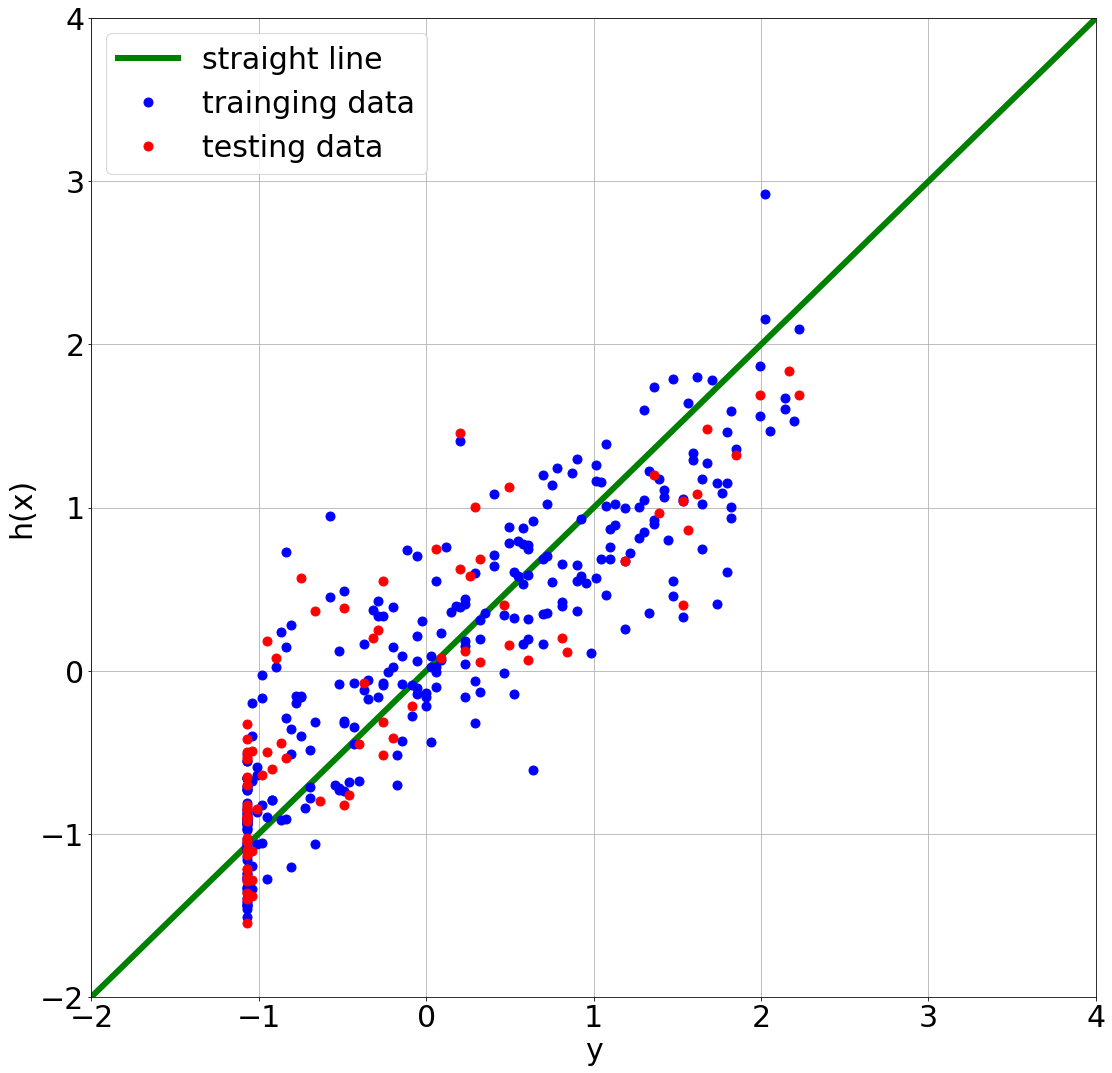

In [11]:
# 這裡我們把資料分成訓練集和測試集
sample = np.random.rand(len(data)) <= 0.8
train = data[sample]
test = data[~sample]
# 我們把我們希望預測的欄位「總價元」分出來
train_x,train_y=train.iloc[:,:6].values,train.iloc[:,6].values
test_x,test_y=test.iloc[:,:6].values,test.iloc[:,6].values
train_MSE,train_MAE,test_MSE,test_MAE=Regression(0.1,train_x,train_y,test_x,test_y,1)

# Leave One Out Cross-Validation

0  iterations


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


The training set:
MSE:  0.20905851702792672  / MAE:  0.35673407718138317  / R^2:  0.7908936939287112
The testing set:
MSE:  0.36391094976407234  / MAE:  0.6032503209813256  / R^2:  -inf
1  iterations
The training set:
MSE:  0.20863795613975675  / MAE:  0.3563546735322994  / R^2:  0.7901411613818201
The testing set:
MSE:  0.5317946849269485  / MAE:  0.7292425419069766  / R^2:  -inf
2  iterations
The training set:
MSE:  0.20961489471935443  / MAE:  0.3574502852926764  / R^2:  0.7894971692040136
The testing set:
MSE:  0.10537505677663643  / MAE:  0.32461524421480337  / R^2:  -inf
3  iterations
The training set:
MSE:  0.20923333682360876  / MAE:  0.3568363896875161  / R^2:  0.7897716622277836
The testing set:
MSE:  0.2565136689406942  / MAE:  0.5064717849403797  / R^2:  -inf
4  iterations
The training set:
MSE:  0.2088860132170114  / MAE:  0.3569557693766642  / R^2:  0.7914085099683199
The testing set:
MSE:  0.4028833758475403  / MAE:  0.6347309476049993  / R^2:  -inf
5  iterations
The tra

The training set:
MSE:  0.20950971679724148  / MAE:  0.35758562187307075  / R^2:  0.791031731392345
The testing set:
MSE:  0.13825280659701308  / MAE:  0.37182362296795113  / R^2:  -inf
34  iterations
The training set:
MSE:  0.20974192937570663  / MAE:  0.35773434303660123  / R^2:  0.7901749899098265
The testing set:
MSE:  0.05449605835028279  / MAE:  0.23344390835976592  / R^2:  -inf
35  iterations
The training set:
MSE:  0.20972357890064197  / MAE:  0.35772050071436634  / R^2:  0.7901933476536838
The testing set:
MSE:  0.056131455557410094  / MAE:  0.2369207790747998  / R^2:  -inf
36  iterations
The training set:
MSE:  0.20893234275124592  / MAE:  0.3566291031737501  / R^2:  0.7914269442189287
The testing set:
MSE:  0.355499382681303  / MAE:  0.59623768975242  / R^2:  -inf
37  iterations
The training set:
MSE:  0.20986179331231553  / MAE:  0.358032145648691  / R^2:  0.7900550784940058
The testing set:
MSE:  0.009793591205331544  / MAE:  0.09896257477113024  / R^2:  -inf
38  iteration

The training set:
MSE:  0.20984280602449606  / MAE:  0.357930179016494  / R^2:  0.790726087295119
The testing set:
MSE:  0.01823622629506057  / MAE:  0.13504157246959386  / R^2:  -inf
66  iterations
The training set:
MSE:  0.2097787250251413  / MAE:  0.3578515651732822  / R^2:  0.7907712741124827
The testing set:
MSE:  0.04057273302029601  / MAE:  0.20142674355779078  / R^2:  -inf
67  iterations
The training set:
MSE:  0.20988406150337796  / MAE:  0.35823568962248714  / R^2:  0.7906888673382684
The testing set:
MSE:  0.001074936472511764  / MAE:  0.03278622382208363  / R^2:  -inf
68  iterations
The training set:
MSE:  0.20831950255541223  / MAE:  0.3556733115807499  / R^2:  0.7920946234349224
The testing set:
MSE:  0.6463467382609448  / MAE:  0.8039569256253377  / R^2:  -inf
69  iterations
The training set:
MSE:  0.20977114338769093  / MAE:  0.35774125660290895  / R^2:  0.7901457643259024
The testing set:
MSE:  0.04245151147319703  / MAE:  0.20603764576697392  / R^2:  -inf
70  iteratio

The training set:
MSE:  0.2098381219967703  / MAE:  0.35797098880664224  / R^2:  0.7900787591859777
The testing set:
MSE:  0.02081191095498689  / MAE:  0.14426333891528675  / R^2:  -inf
98  iterations
The training set:
MSE:  0.2098384331369668  / MAE:  0.3581193968942472  / R^2:  0.7900784479225357
The testing set:
MSE:  0.013550270474533225  / MAE:  0.11640562905003016  / R^2:  -inf
99  iterations
The training set:
MSE:  0.2098092005124429  / MAE:  0.3579179738904982  / R^2:  0.7906262406244563
The testing set:
MSE:  0.023708926497866847  / MAE:  0.15397703237128207  / R^2:  -inf
100  iterations
The training set:
MSE:  0.20756407844512567  / MAE:  0.3562642442224896  / R^2:  0.7911015759202952
The testing set:
MSE:  0.9244720782646367  / MAE:  0.9614947104714808  / R^2:  -inf
101  iterations
The training set:
MSE:  0.2098781765269652  / MAE:  0.35834967658001216  / R^2:  0.7904198884480973
The testing set:
MSE:  5.2934523548244795e-05  / MAE:  0.00727561155836709  / R^2:  -inf
102  it

The training set:
MSE:  0.20933410547303014  / MAE:  0.3571190907490582  / R^2:  0.7901743316239999
The testing set:
MSE:  0.21201475044926754  / MAE:  0.46045059501456564  / R^2:  -inf
130  iterations
The training set:
MSE:  0.20986595978087988  / MAE:  0.35824229762438337  / R^2:  0.7907054372822885
The testing set:
MSE:  0.0035780816112831013  / MAE:  0.059817067892726915  / R^2:  -inf
131  iterations
The training set:
MSE:  0.20986551785741525  / MAE:  0.35822897234757617  / R^2:  0.7907060560966541
The testing set:
MSE:  0.004155870058867913  / MAE:  0.06446603802676192  / R^2:  -inf
132  iterations
The training set:
MSE:  0.20973093733900577  / MAE:  0.35781970980679906  / R^2:  0.7901859863005746
The testing set:
MSE:  0.05093617495520396  / MAE:  0.225690440549005  / R^2:  -inf
133  iterations
The training set:
MSE:  0.20932097633130073  / MAE:  0.35698580690195514  / R^2:  0.7896277439515171
The testing set:
MSE:  0.24453784642405202  / MAE:  0.4945076808544555  / R^2:  -inf
1

The training set:
MSE:  0.20676665690722548  / MAE:  0.35497784367184293  / R^2:  0.7936101052433981
The testing set:
MSE:  1.1754874089975922  / MAE:  1.084198971129189  / R^2:  -inf
162  iterations
The training set:
MSE:  0.20899657502177185  / MAE:  0.3563780942032856  / R^2:  0.790955650094295
The testing set:
MSE:  0.36682553385072303  / MAE:  0.6056612368731575  / R^2:  -inf
163  iterations
The training set:
MSE:  0.20987878514316097  / MAE:  0.3583422504374736  / R^2:  0.7906926468393166
The testing set:
MSE:  0.00011834111117909334  / MAE:  0.010878470075295209  / R^2:  -inf
164  iterations
The training set:
MSE:  0.20979550095858146  / MAE:  0.35801382627552114  / R^2:  0.7907466857996934
The testing set:
MSE:  0.02759787170744752  / MAE:  0.16612607172700955  / R^2:  -inf
165  iterations
The training set:
MSE:  0.20914981666837718  / MAE:  0.3568275563870958  / R^2:  0.7913985335934905
The testing set:
MSE:  0.28049878097090203  / MAE:  0.5296213562262213  / R^2:  -inf
166  i

The training set:
MSE:  0.20892515807840617  / MAE:  0.35715932564219427  / R^2:  0.7897925155734112
The testing set:
MSE:  0.3654424845202862  / MAE:  0.6045183905558922  / R^2:  -inf
194  iterations
The training set:
MSE:  0.2093769084007346  / MAE:  0.35753346274793024  / R^2:  0.7898409320199564
The testing set:
MSE:  0.19180683988631006  / MAE:  0.4379575777244984  / R^2:  -inf
195  iterations
The training set:
MSE:  0.2098223503776  / MAE:  0.3580682243073215  / R^2:  0.7903733336910652
The testing set:
MSE:  0.01847297742921925  / MAE:  0.13591533184015425  / R^2:  -inf
196  iterations
The training set:
MSE:  0.2097448415031285  / MAE:  0.3576775175653122  / R^2:  0.7908164776680844
The testing set:
MSE:  0.05723949484582035  / MAE:  0.23924776873739148  / R^2:  -inf
197  iterations
The training set:
MSE:  0.20346865079195658  / MAE:  0.35409276101428866  / R^2:  0.7969021018603497
The testing set:
MSE:  2.3817586629595646  / MAE:  1.543294742736968  / R^2:  -inf
198  iterations

The training set:
MSE:  0.2091755248243713  / MAE:  0.3568483433228206  / R^2:  0.7907022097709806
The testing set:
MSE:  0.28557071547976104  / MAE:  0.5343881692924732  / R^2:  -inf
226  iterations
The training set:
MSE:  0.20936283708495768  / MAE:  0.3568904063556598  / R^2:  0.790099591683705
The testing set:
MSE:  0.22044368817891272  / MAE:  0.46951431094154383  / R^2:  -inf
227  iterations
The training set:
MSE:  0.20966530464091498  / MAE:  0.3575862882841851  / R^2:  0.7906952427547788
The testing set:
MSE:  0.08367315031272862  / MAE:  0.28926311605997856  / R^2:  -inf
228  iterations
The training set:
MSE:  0.2095256093155025  / MAE:  0.3574893300624101  / R^2:  0.7907462598605193
The testing set:
MSE:  0.1275070488644087  / MAE:  0.3570812916751712  / R^2:  -inf
229  iterations
The training set:
MSE:  0.20857675200542014  / MAE:  0.35681478375899456  / R^2:  0.7904313694093913
The testing set:
MSE:  0.48913893780018247  / MAE:  0.6993846851341416  / R^2:  -inf
230  iterati

The training set:
MSE:  0.20936646783329638  / MAE:  0.3570364086408413  / R^2:  0.7906821076631766
The testing set:
MSE:  0.197524183090659  / MAE:  0.44443692813565683  / R^2:  -inf
258  iterations
The training set:
MSE:  0.208382959643403  / MAE:  0.3564053014298722  / R^2:  0.7917841104711901
The testing set:
MSE:  0.5528880049117469  / MAE:  0.7435643919068119  / R^2:  -inf
259  iterations
The training set:
MSE:  0.20907208819735396  / MAE:  0.3568164084141809  / R^2:  0.7910379120105154
The testing set:
MSE:  0.29845077115551283  / MAE:  0.5463064809752057  / R^2:  -inf
260  iterations
The training set:
MSE:  0.2097505023973204  / MAE:  0.3577479620453989  / R^2:  0.7903598547482142
The testing set:
MSE:  0.05117654863864993  / MAE:  0.22622234336742675  / R^2:  -inf
261  iterations
The training set:
MSE:  0.20987068357633865  / MAE:  0.35809054308123894  / R^2:  0.790042869191041
The testing set:
MSE:  0.007501039873601304  / MAE:  0.08660854388339123  / R^2:  -inf
262  iteratio

The training set:
MSE:  0.20985560608673906  / MAE:  0.35812385807329256  / R^2:  0.7902868930460349
The testing set:
MSE:  0.007536777022776017  / MAE:  0.08681461295643733  / R^2:  -inf
290  iterations
The training set:
MSE:  0.20981904016018782  / MAE:  0.3579779728754022  / R^2:  0.7900978485810517
The testing set:
MSE:  0.019155438814698656  / MAE:  0.1384031748721779  / R^2:  -inf
291  iterations
The training set:
MSE:  0.209678008124715  / MAE:  0.3576440668197712  / R^2:  0.7902389364806157
The testing set:
MSE:  0.0697165058778315  / MAE:  0.26403883403361617  / R^2:  -inf
292  iterations
The training set:
MSE:  0.20962322353717325  / MAE:  0.3575566936413397  / R^2:  0.7902937427688383
The testing set:
MSE:  0.09614245706695576  / MAE:  0.310068471578385  / R^2:  -inf
293  iterations
The training set:
MSE:  0.20976993028227983  / MAE:  0.3578320977341371  / R^2:  0.7905044874162661
The testing set:
MSE:  0.038947824102796465  / MAE:  0.1973520309061867  / R^2:  -inf
294  iter

The training set:
MSE:  0.20959413945208602  / MAE:  0.3574568380193027  / R^2:  0.7906532895277016
The testing set:
MSE:  0.1099358751444639  / MAE:  0.3315657930855713  / R^2:  -inf
322  iterations
The training set:
MSE:  0.2070082721501666  / MAE:  0.3546996529830811  / R^2:  0.7923180691961891
The testing set:
MSE:  1.2157071938532162  / MAE:  1.1025911272331264  / R^2:  -inf
323  iterations
The training set:
MSE:  0.20928626899120326  / MAE:  0.35670109080833434  / R^2:  0.7904371451762956
The testing set:
MSE:  0.2539667926009394  / MAE:  0.5039511807714507  / R^2:  -inf
324  iterations
The training set:
MSE:  0.20987737328115988  / MAE:  0.35821590005852466  / R^2:  0.7906485655092068
The testing set:
MSE:  0.004492072068843391  / MAE:  0.06702292196587217  / R^2:  -inf
325  iterations
The training set:
MSE:  0.20984417940902558  / MAE:  0.3580949960151074  / R^2:  0.7900726993743254
The testing set:
MSE:  0.014981329918969742  / MAE:  0.12239824312043757  / R^2:  -inf
326  iter

The training set:
MSE:  0.2098868527682159  / MAE:  0.3583187245151827  / R^2:  0.7900300091118236
The testing set:
MSE:  0.00015892636295857535  / MAE:  0.012606599976146438  / R^2:  -inf
354  iterations
The training set:
MSE:  0.20963245741019892  / MAE:  0.357698572507843  / R^2:  0.7902845052381904
The testing set:
MSE:  0.10659856730898006  / MAE:  0.3264943603019508  / R^2:  -inf
355  iterations
The training set:
MSE:  0.2093789829384363  / MAE:  0.3575574850933914  / R^2:  0.7905380801135312
The testing set:
MSE:  0.1998863935974331  / MAE:  0.44708656163816096  / R^2:  -inf
356  iterations
The training set:
MSE:  0.2096604214504757  / MAE:  0.3576630765162771  / R^2:  0.7908191554404289
The testing set:
MSE:  0.0940152320084945  / MAE:  0.3066190339957624  / R^2:  -inf
357  iterations
The training set:
MSE:  0.20942226696177849  / MAE:  0.35735252383864047  / R^2:  0.7904947789449878
The testing set:
MSE:  0.21794336171263876  / MAE:  0.46684404431527105  / R^2:  -inf
358  iter

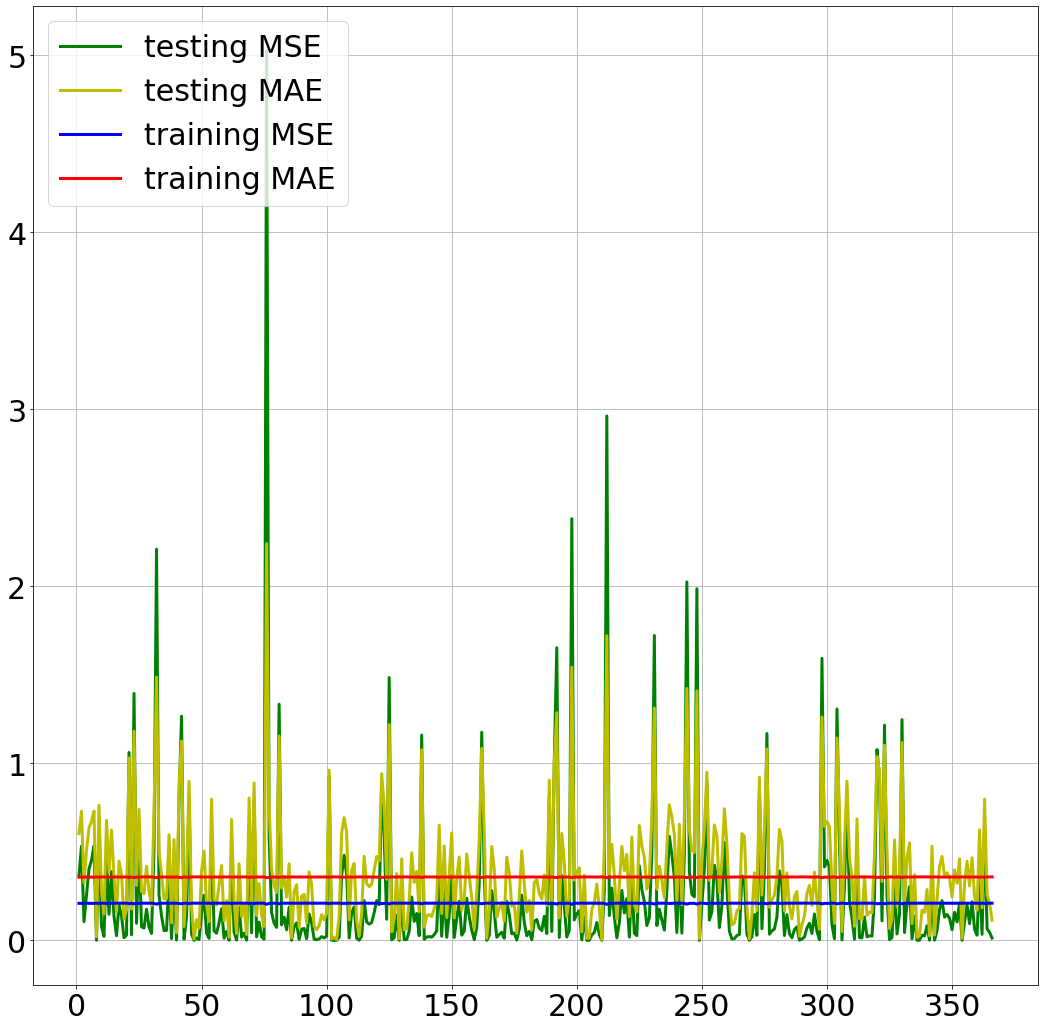

In [12]:
# 創建布林運算矩陣，和MSE&MAE矩陣
boolean=np.ones(len(data), dtype=bool)
train_MSE=np.zeros(len(data))
train_MAE=np.zeros(len(data))
test_MSE=np.zeros(len(data))
test_MAE=np.zeros(len(data))
# 跑迴圈讓每筆資料輪流當驗證集
for i in range(0,len(data)):
    # 設定其中一筆資料為測試集
    boolean[i]=False
    # 分訓練集和測試集
    train=data[boolean]
    test=data[~boolean]
    train_x,train_y=train.iloc[:,:6].values,train.iloc[:,6].values
    test_x,test_y=test.iloc[:,:6].values,test.iloc[:,6].values
    # 計算並輸出結果
    print(i," iterations")
    train_MSE[i],train_MAE[i],test_MSE[i],test_MAE[i]=Regression(0.1,train_x,train_y,test_x,test_y,0)
    print("=======================================================")
    # 把原本的資料調回True
    boolean[i]=True
# 繪圖
x_axis=np.linspace(1,366,366)
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_axis,test_MSE,"g-",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_MAE,"y-",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_MSE,"b-",linewidth=3,label="training MSE")
plt.plot(x_axis,train_MAE,"r-",linewidth=3,label="training MAE")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper left",fontsize=30)
plt.grid()
plt.show()

# K-Fold Cross-Validation

0  fold
The training set:
MSE:  0.21073731712809363  / MAE:  0.3572060456787752  / R^2:  0.7930678577473054
The testing set:
MSE:  0.1769499224969389  / MAE:  0.35516120796441936  / R^2:  0.5601339675162496
1  fold
The training set:
MSE:  0.2125505710269998  / MAE:  0.36018563962859307  / R^2:  0.7884882936401596
The testing set:
MSE:  0.11510600691237192  / MAE:  0.26282632121366917  / R^2:  0.8142418976709065
2  fold
The training set:
MSE:  0.2092115460617797  / MAE:  0.3540985971057335  / R^2:  0.7902744916445598
The testing set:
MSE:  0.23392264742396032  / MAE:  0.4363872504620776  / R^2:  0.7793582335145288
3  fold
The training set:
MSE:  0.20631715673203774  / MAE:  0.3558514772483457  / R^2:  0.7916400569511016
The testing set:
MSE:  0.5829652466829797  / MAE:  0.48340010154999713  / R^2:  0.5485096425629414
4  fold
The training set:
MSE:  0.20966550664446176  / MAE:  0.3569024879671469  / R^2:  0.7928594499285706
The testing set:
MSE:  0.21408951136319462  / MAE:  0.3849065168

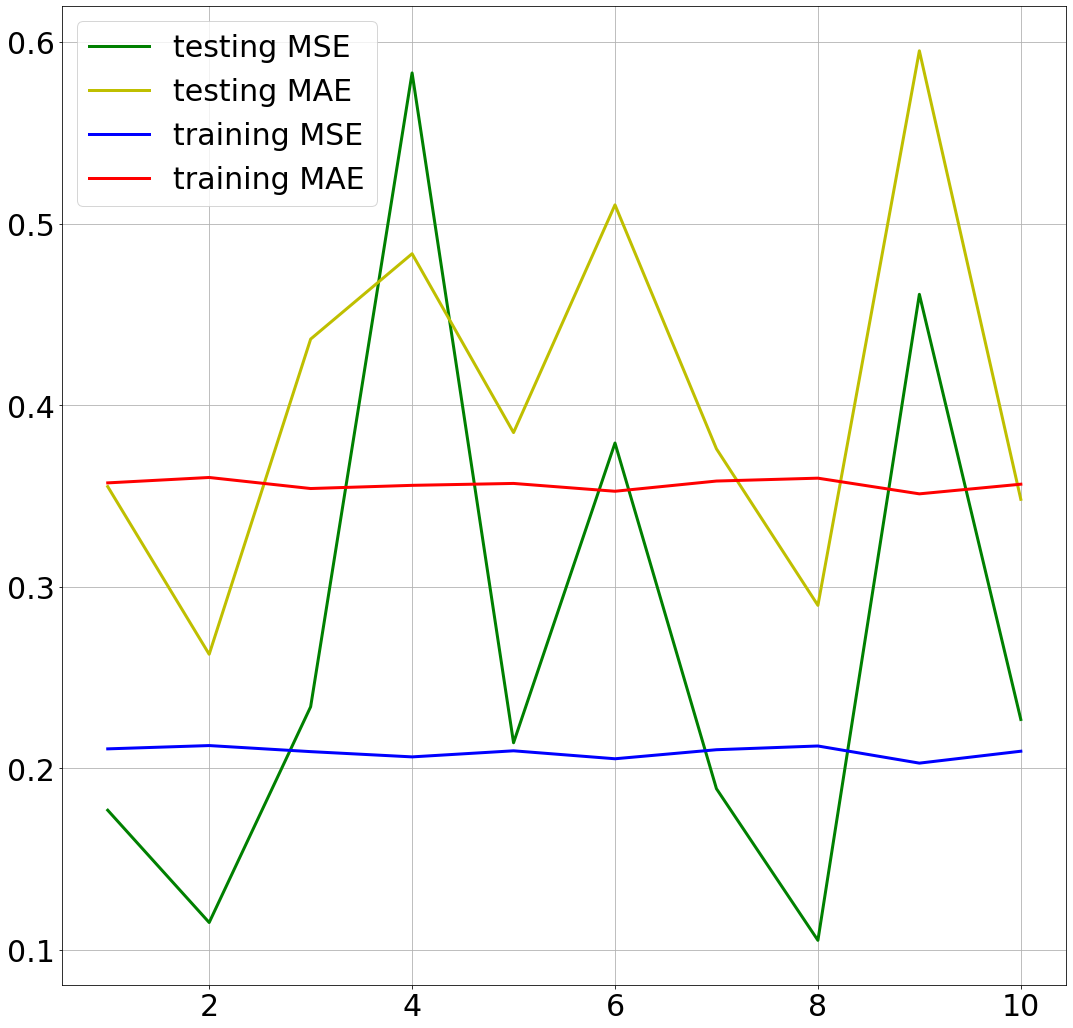

In [13]:
# 把資料分成10組
k=10
train_MSE=np.zeros(k)
train_MAE=np.zeros(k)
test_MSE=np.zeros(k)
test_MAE=np.zeros(k)
# 跑迴圈輪流計算每組
for i in range(0,k):
    # 初始化我們的布林值
    boolean=np.ones(len(data), dtype=bool)
    # 計算一組資料最少會有幾筆資料
    k_num=int(len(data)/k)
    # 跑迴圈標記所要測試集
    for j in range(0,k_num+1):
        if(i+k_num*j<len(data)):
            boolean[i+k_num*j]=False
    # 分訓練集和測試集
    train=data[boolean]
    test=data[~boolean]
    train_x,train_y=train.iloc[:,:6].values,train.iloc[:,6].values
    test_x,test_y=test.iloc[:,:6].values,test.iloc[:,6].values
     # 計算並輸出結果
    print(i," fold")
    train_MSE[i],train_MAE[i],test_MSE[i],test_MAE[i]=Regression(0.1,train_x,train_y,test_x,test_y,0)
    print("=======================================================")
# 計算並輸出結果
x_axis=np.linspace(1,10,10)
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_axis,test_MSE,"g-",linewidth=3,label="testing MSE")
plt.plot(x_axis,test_MAE,"y-",linewidth=3,label="testing MAE")
plt.plot(x_axis,train_MSE,"b-",linewidth=3,label="training MSE")
plt.plot(x_axis,train_MAE,"r-",linewidth=3,label="training MAE")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper left",fontsize=30)
plt.grid()
plt.show()